# Code to transmit the Data to the FPGA

In [2]:
import serial
import struct
from time import sleep

ComPort = serial.Serial(
    port='COM6',              
    baudrate=9600,
    bytesize=serial.EIGHTBITS,
    parity=serial.PARITY_NONE,
    stopbits=serial.STOPBITS_ONE,
    timeout=1
)

file_path = r"C:\Users\krish\Downloads\blurred_img_1.txt"
with open(file_path, 'r') as f:
    lines = [line.strip() for line in f if line.strip()]


arr = []
for line in lines:
    val = int(line) #
    
        
    arr.append(val)

print("Starting transmission...")
ComPort.reset_output_buffer()
ComPort.reset_input_buffer()

for i, val in enumerate(arr):
    
    ComPort.write(struct.pack('B', val))
    print(f"{i:5}: {val}")
    sleep(0.02)


ComPort.close()
print("Completed transmission")


Starting transmission...
    0: 0
    1: 64
    2: 64
    3: 64
    4: 64
    5: 64
    6: 64
    7: 64
    8: 64
    9: 64
   10: 64
   11: 64
   12: 64
   13: 64
   14: 64
   15: 64
   16: 64
   17: 0
   18: 64
   19: 128
   20: 191
   21: 191
   22: 191
   23: 191
   24: 191
   25: 146
   26: 153
   27: 153
   28: 146
   29: 191
   30: 191
   31: 191
   32: 191
   33: 191
   34: 128
   35: 64
   36: 64
   37: 191
   38: 255
   39: 255
   40: 255
   41: 255
   42: 166
   43: 191
   44: 172
   45: 172
   46: 191
   47: 165
   48: 255
   49: 255
   50: 255
   51: 255
   52: 191
   53: 64
   54: 64
   55: 191
   56: 255
   57: 255
   58: 255
   59: 166
   60: 204
   61: 165
   62: 191
   63: 191
   64: 165
   65: 204
   66: 165
   67: 255
   68: 255
   69: 255
   70: 191
   71: 64
   72: 64
   73: 191
   74: 255
   75: 217
   76: 172
   77: 191
   78: 153
   79: 191
   80: 242
   81: 242
   82: 191
   83: 153
   84: 191
   85: 172
   86: 217
   87: 255
   88: 191
   89: 64
   90: 64
   

# Code to receive the Data from the FPGA

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import serial
from time import sleep

ComPort = serial.Serial(
    port='COM6',             
    baudrate=9600,
    bytesize=serial.EIGHTBITS,
    parity=serial.PARITY_NONE,
    stopbits=serial.STOPBITS_ONE,
    timeout=None                
)

arr = []

print("Receiving data...")

for i in range(1024):
    byte = ComPort.read(size=1)
    val = int.from_bytes(byte, byteorder='little', signed=False)
    arr.append(val)
    print(f"{i:5}: {val}")
    sleep(0.005)

ComPort.close()

print("Reception complete")
print(f"Total pixels received: {len(arr)}")


Receiving data...
    0: 180
    1: 51
    2: 0
    3: 40
    4: 180
    5: 51
    6: 0
    7: 99
    8: 180
    9: 51
   10: 0
   11: 52
   12: 180
   13: 51
   14: 0
   15: 75
   16: 181
   17: 51
   18: 0
   19: 175
   20: 180
   21: 51
   22: 0
   23: 216
   24: 179
   25: 51
   26: 0
   27: 40
   28: 180
   29: 51
   30: 0
   31: 40
   32: 180
   33: 51
   34: 0
   35: 216
   36: 179
   37: 51
   38: 0
   39: 175
   40: 180
   41: 51
   42: 0
   43: 76
   44: 181
   45: 51
   46: 0
   47: 60
   48: 180
   49: 51
   50: 0
   51: 99
   52: 180
   53: 51
   54: 0
   55: 36
   56: 180
   57: 51
   58: 0
   59: 92
   60: 180
   61: 51
   62: 0
   63: 40
   64: 180
   65: 51
   66: 0
   67: 97
   68: 179
   69: 51
   70: 0
   71: 113
   72: 179
   73: 51
   74: 0
   75: 130
   76: 180
   77: 51
   78: 0
   79: 215
   80: 179
   81: 51
   82: 0
   83: 77
   84: 178
   85: 51
   86: 0
   87: 115
   88: 162
   89: 51
   90: 0
   91: 119
   92: 167
   93: 51
   94: 0
   95: 110
   96: 167
 

In [4]:
arr1 = arr[3:]
len(arr1)

j = 0
img_n = np.zeros(256, dtype=np.int64)
for i in range(1, 256):
    num0 = arr1[j]
    num1 = arr1[j+1]
    num2 = arr1[j+2]
    num3 = arr1[j+3]
    j += 4

    num0 = f"{num0:08b}"
    num1 = f"{num1:08b}"
    num2 = f"{num2:08b}"
    num3 = f"{num3:08b}"

    number = num3 + num2 + num1 + num0
    number = int(number, 2)
    number -= 4480
    print(number)
    number -= 3377640
    number /= 100
    img_n[i] = number
img_n[0] = img_n[1]

3383976
3384035
3383988
3384267
3384111
3383896
3383976
3383976
3383896
3384111
3384268
3383996
3384035
3383972
3384028
3383976
3383777
3383793
3384066
3383895
3383501
3379443
3380727
3380718
3379442
3383500
3383880
3384064
3383819
3383777
3383978
3384038
3383842
3384448
3383867
3384362
3379590
3382292
3382359
3382319
3382275
3379519
3384390
3383892
3384501
3383844
3384038
3383948
3384141
3384145
3384300
3380031
3381225
3383907
3384802
3384737
3383970
3381206
3379937
3384263
3384142
3384136
3383942
3384217
3384023
3380479
3380641
3381963
3382307
3381852
3382975
3382938
3381817
3382271
3382036
3380711
3380494
3383967
3384223
3384140
3383419
3379892
3382487
3380316
3382948
3376969
3381914
3381898
3376967
3382896
3380221
3382438
3379882
3383406
3384148
3383957
3383826
3384689
3379591
3381004
3380649
3378026
3382445
3382431
3378146
3380674
3380987
3379620
3384703
3383834
3383948
3383966
3384495
3382328
3385236
3383932
3378883
3381133
3381796
3381873
3381141
3378771
3384021
3385258
3382279


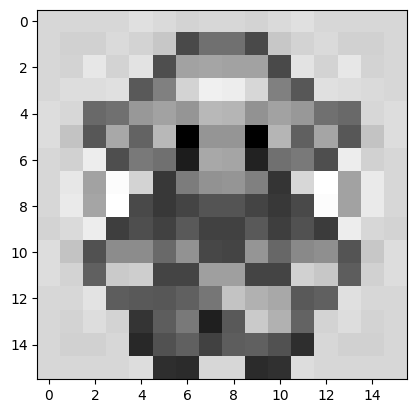

In [5]:
plt.imshow(img_n.reshape(16, 16), cmap="grey")
plt.show()